<a href="https://colab.research.google.com/github/xtrimkeyz/gozpel/blob/master/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#End-end-multiclass Dog breed classification

this notebook buils an end-to-end multi-class image classifier using TensorFlow image classifier using Tensorflow 2.0 Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and i take a photo of a dog, i want to know what breed is the dog.
 
## 2. Data

The data we are using is from Kaggle dog breed competition. https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed for each image. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/Transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ images in the test set (these images have no labels because we want to predict them).

In [ ]:
#Unzip the uploaded data into google drive
#!unzip "drive/My Drive/Dog vision/dog-breed-identification.zip" -d "drive/My Drive/Dog vision" 

## Get our workspace ready

* Import Tensorflow 2.x
* Import tensorflow hub
* Make sure you are using a GPU


In [ ]:
#Import necessary tools

import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF_Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "availability (YESSSSSSS!!!!!!!" if tf.config.list_physical_devices("GPU") else "not available:(")

TF version: 2.2.0
TF_Hub version: 0.8.0
GPU availability (YESSSSSSS!!!!!!!


 ## Getting our data ready

 with all our machine learning models, our data has to be in numerical format.  So that's what we will be doing, turning our images into tensors(numerical representation).

Let's start by accessing our data and checking out the labels.

In [ ]:
#checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     20f44e34fa743c7b6bcbf960bd7ac4d1  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

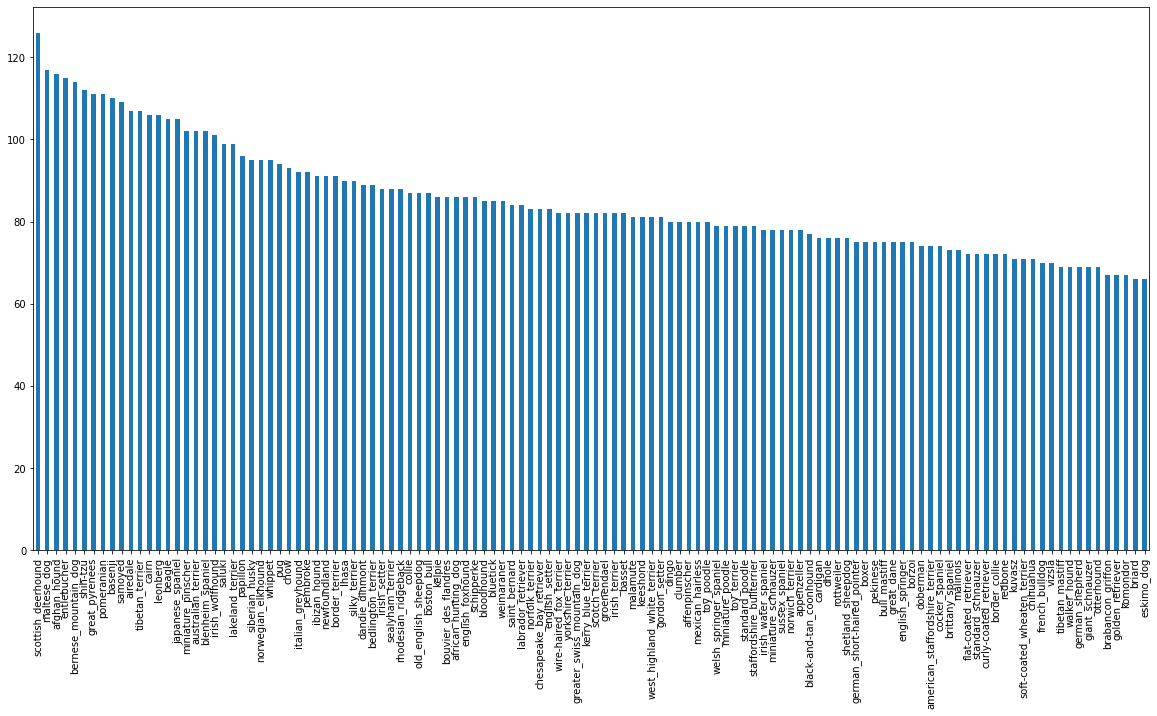

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

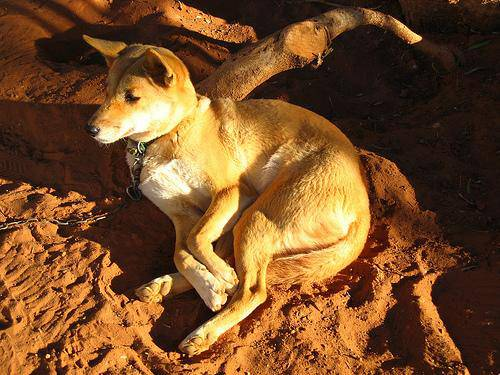

In [ ]:
# let's  view our image
from IPython.display import Image
Image("drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all our image file pathnames.

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog vision/train/" + fname + ".jpg" for fname in labels_csv['id']]

filenames[:10]

['drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#check whether number of filenames matches number of actual images
import os
if len(os.listdir("drive/My Drive/Dog vision/train/")) == len(filenames):
  print("file name match the actual amount of files!!! Proceed.")
else:
  print("file name do not match the actual amount of files, check the target directory") 

file name match the actual amount of files!!! Proceed.


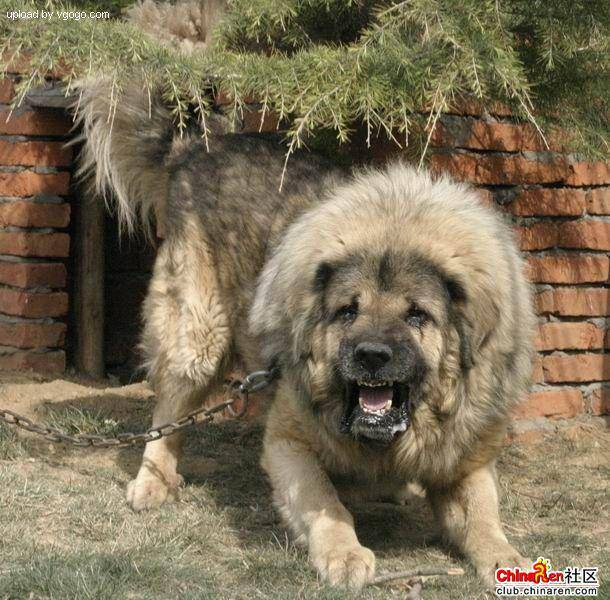

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we have now got our training images in a list, let's prepare our labels

In [ ]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) #does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
#see if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of directory")
else:
  print("Number of labels does not match number of directory")

Number of labels matches number of directory


In [ ]:
#find the unique labels
unique_labels= np.unique(labels)
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Turn a single label into an array of boolean
print(labels[0])
labels[0] == unique_labels

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Turn every label into a boolean array
boolean_labels =[label == unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#example: turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_labels == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occur in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own validation set

since the dataset from kaggle doesn't come with a validation set, we are going to create our own


In [ ]:
#Setup X and y
X = filenames
y = boolean_labels

We're going to start off experimenting a thousand images and increase as needed

In [ ]:
#Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max:10000, step: 1000}

In [ ]:
#Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

#Spilt them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                  y[:NUM_IMAGES],
                                  test_size=0.2,
                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
#Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/My Drive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing images (turning images into tensors)

To preprocess our images into tensors, we are going to write a function which does a few things:
* Take an image filepath as input
* use Tensorflow to read file and save it to a variable, `image`
* Turn our `image` (jpg) to Tensors
* Resize the `image`to be a shape of (224, 224)
* Return the modfied `image`

Before we do, let's see what importing an image looks like

In [ ]:
# convert to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[90])
image.shape

(375, 500, 3)

In [ ]:
image[:2]

array([[[ 91, 169, 208],
        [ 94, 172, 211],
        [ 97, 175, 214],
        ...,
        [168, 129,  50],
        [174, 135,  56],
        [171, 132,  53]],

       [[ 90, 168, 207],
        [ 92, 170, 209],
        [ 93, 171, 210],
        ...,
        [170, 131,  52],
        [171, 132,  53],
        [165, 126,  47]]], dtype=uint8)

In [ ]:
#Turning into tensorflow
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 91, 169, 208],
        [ 94, 172, 211],
        [ 97, 175, 214],
        ...,
        [168, 129,  50],
        [174, 135,  56],
        [171, 132,  53]],

       [[ 90, 168, 207],
        [ 92, 170, 209],
        [ 93, 171, 210],
        ...,
        [170, 131,  52],
        [171, 132,  53],
        [165, 126,  47]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's write a function to preprocess them.

* Take an image filepath as input
* use Tensorflow to read file and save it to a variable, image
* Normalize our image (convert color channel from 0-255 to 0-1)
* Turn our image (jpg) to Tensors
* Resize the imageto be a shape of (224, 224)
* Return the modfied image

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical tensor with 3 colour channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)
  #convert the colour channel from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (254, 254)
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))

  return image
  

## Turning data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time.  You can manually manipulate the batch size if need be.

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this `(image, label)`.

In [ ]:
# create a simple function to return a tuple
def get_image_label(image_path, label):
  """
  Takes an image file path and the associated label, processes
  the image and returns a tuple (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form of `(image, label)`.  let's write a function to turn all of our data (X,y) into batches

In [ ]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and (y) pairs.
  Shuffles the data if its training data but doesn't shuffle if it is validation data
  Also accepts test data as input
  """
  # if the data is a test data, we probably don't have label
  if test_data:
    print("Creating test data batches......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths no labels, turns X into tensor dataset
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # if the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating valid data batches......")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data  batches")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # shuffling pathnames and labels before mapping image processor is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
#Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data  batches
Creating valid data batches......


In [ ]:
# check out the different attributes of our datasets
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing our data

Our data is now in batches, however, this can be a little difficult to understand/comprehend, let's visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def view_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch 
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # create subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label
    plt.title(unique_labels[labels[i].argmax()])
    # turn the grid lines off
    plt.axis("off")




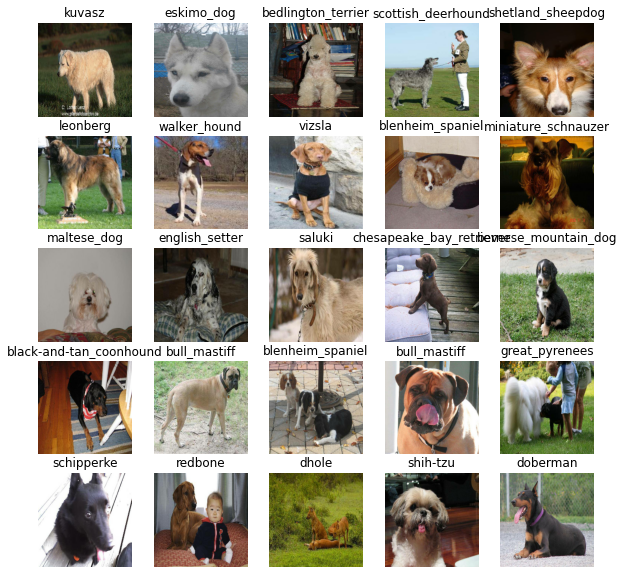

In [ ]:
# let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator()) # unwinds data from batches and turns it into numpy iterator
view_25_images(train_images, train_labels)

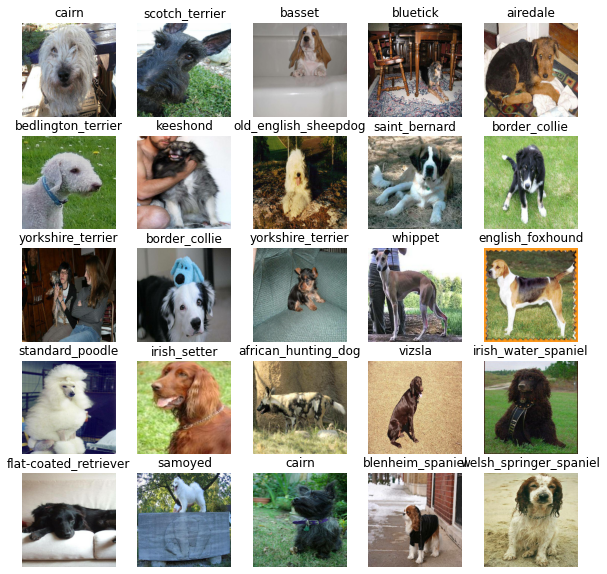

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator()) # unwinds data from batches and turns it into numpy iterator
view_25_images(val_images, val_labels)

# Building a model

Before we build a model, there are a few things we need to define;
* The input shape (our input shape, in the form of tensors) to our model
* The output shape (image labels, in the form of tensors) of our model
* The URL of the model we want to use from tensorflow hub https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4.

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, width, height, colour channels

#Setup output shape of the model
OUTPUT_SHAPE = len(unique_labels)

#Setup Model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our input, outputs and model ready to go, let's put themm together in keras deep learning model!

Knowing this, let's create a function which
* Takes the input shape, output shape, the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved)
* Builds the model (tells the model the input shape it will be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [ ]:
#Create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # setup model layers
  model = tf.keras.Sequential([
     hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
     tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax') #Layer 2, output layer
  ])

  # compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # how well is your model guessing
                optimizer=tf.keras.optimizers.Adam(), #improves your model's guesses
                metrics='accuracy', # evaluates your model's performance
                ) 
  # Build model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating callbcks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress, stop training early if a model stops improving.

We'll create two callbacks, one for Tensorboard which helps track our model's progress and another for stopping which prevents our model from training for too long.

## TensorBoard Callbacks

To load tensorboard callback, we need to do three things
1. Load the tensorboard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our model's training logs with the %tensorboard magic function (we will do this after our model's training.)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a Tensorflow callback
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog vision/logs",
                        # make it so the log gets tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


## Early stopping Callbacks

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create  early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on subset of data)

our first model is going to train on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min: 10, max: 100, step: 10}

In [ ]:
#  check to make sure we are still running on a GPU
print("GPU", "available (YESSSS!!!)" if tf.config.list_physical_devices("GPU") else "not available:(")

GPU available (YESSSS!!!)


# Let's create a function which trains a model.

* Creates a model using `create_model`
* Setup a tensorboard callback using `create_tensorboard_callback`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for(NUM_EPOCHS) and the callbacks we would like to use
* Return the model

In [ ]:
# Build a functin to train and to return a trained model
def train_model():
  """
  Trains a given model and returns a trained model
  """
  # create a model
  model = create_model()

  # Create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # return the fitted model
  return model

In [ ]:
# Fit the model
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 493s 20s/step - loss: 4.5551 - accuracy: 0.1025 - val_loss: 3.3868 - val_accuracy: 0.2100
Epoch 2/100
25/25 [==============================] - 6s 233ms/step - loss: 1.6448 - accuracy: 0.6662 - val_loss: 2.1632 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 6s 224ms/step - loss: 0.5840 - accuracy: 0.9350 - val_loss: 1.6406 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 6s 225ms/step - loss: 0.2627 - accuracy: 0.9887 - val_loss: 1.4670 - val_accuracy: 0.6800
Epoch 5/100
25/25 [==============================] - 6s 223ms/step - loss: 0.1490 - accuracy: 0.9975 - val_loss: 1.3934 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 6s 240ms/step - loss: 0.1024 - accuracy: 1.0000 - val_loss: 1.3433 - val_accuracy: 0.6850
Epoch 7/100
25/25 [==============================

**Question**  ways to prevent overfitting in deep learning neural networks

**Note** overfitting is a good thing, it means our model is learning

## Checking the tensorboard log

The tensorboard magic function (%tensorboard) will access the log directory we created earlier and visualize its contents

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ vision/logs

<IPython.core.display.Javascript object>

# Making and evaluating predictions, using a trained model


In [ ]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 143ms/step


array([[7.4387682e-03, 6.7036563e-05, 2.6739102e-03, ..., 3.3342899e-04,
        3.6124562e-05, 4.1729794e-03],
       [7.8433449e-04, 2.9102681e-04, 2.1018896e-02, ..., 9.0311479e-04,
        7.3612514e-03, 1.7791435e-04],
       [9.8558565e-05, 9.8742305e-05, 4.6865811e-05, ..., 2.3237682e-05,
        5.1388919e-04, 1.6789738e-03],
       ...,
       [1.6764121e-05, 2.1382490e-04, 3.3672066e-05, ..., 6.4289554e-05,
        9.7962569e-05, 5.2333518e-04],
       [3.9480091e-03, 7.7184530e-05, 2.2067255e-04, ..., 7.8403529e-05,
        9.6519048e-05, 1.0328979e-02],
       [1.3256066e-04, 5.2438183e-05, 2.1840703e-04, ..., 7.2992258e-03,
        4.7747945e-04, 4.1319212e-04]], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
predictions[0]

array([7.43876817e-03, 6.70365625e-05, 2.67391023e-03, 1.29282547e-04,
       7.44727440e-04, 2.32902075e-05, 8.35405476e-03, 1.87793653e-03,
       1.09682907e-03, 1.27934641e-03, 3.42108746e-04, 3.23383021e-04,
       2.51133839e-04, 2.24227420e-04, 1.26008794e-03, 4.67391830e-04,
       1.03949220e-04, 3.10575068e-01, 2.57199154e-05, 5.73610632e-05,
       3.89354303e-04, 1.15040901e-04, 1.01688984e-05, 1.19570002e-03,
       1.45367856e-04, 6.81594101e-05, 1.86909869e-01, 1.96326073e-04,
       4.56384500e-04, 2.45707226e-04, 1.88621179e-05, 2.40325206e-03,
       1.15431030e-04, 3.63475265e-05, 5.18181441e-05, 8.42214152e-02,
       2.27593064e-05, 1.50239648e-04, 7.12942710e-05, 1.58664945e-03,
       6.28989795e-03, 5.37232299e-05, 1.98699970e-04, 7.03600526e-05,
       5.34951614e-05, 1.30325236e-04, 8.31962279e-06, 5.80260457e-05,
       8.60160944e-05, 1.53114852e-05, 2.98422121e-04, 2.24191717e-05,
       1.51327113e-03, 6.78682409e-05, 1.56068461e-04, 3.97701551e-05,
      

In [ ]:
# First Prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}") 
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_labels[np.argmax(predictions[index])]}")

[7.43876817e-03 6.70365625e-05 2.67391023e-03 1.29282547e-04
 7.44727440e-04 2.32902075e-05 8.35405476e-03 1.87793653e-03
 1.09682907e-03 1.27934641e-03 3.42108746e-04 3.23383021e-04
 2.51133839e-04 2.24227420e-04 1.26008794e-03 4.67391830e-04
 1.03949220e-04 3.10575068e-01 2.57199154e-05 5.73610632e-05
 3.89354303e-04 1.15040901e-04 1.01688984e-05 1.19570002e-03
 1.45367856e-04 6.81594101e-05 1.86909869e-01 1.96326073e-04
 4.56384500e-04 2.45707226e-04 1.88621179e-05 2.40325206e-03
 1.15431030e-04 3.63475265e-05 5.18181441e-05 8.42214152e-02
 2.27593064e-05 1.50239648e-04 7.12942710e-05 1.58664945e-03
 6.28989795e-03 5.37232299e-05 1.98699970e-04 7.03600526e-05
 5.34951614e-05 1.30325236e-04 8.31962279e-06 5.80260457e-05
 8.60160944e-05 1.53114852e-05 2.98422121e-04 2.24191717e-05
 1.51327113e-03 6.78682409e-05 1.56068461e-04 3.97701551e-05
 1.48103136e-04 8.92795157e-04 3.32825060e-04 8.60854462e-02
 1.29069915e-04 1.76217454e-05 3.70525615e-03 7.19144518e-05
 7.94603257e-04 1.327522

Having the functionality above is greate but we want to be to do it at scale.

And it could be even better if we could see the image the prediction is been made on

**Note** Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn probabilities into their corresponding labels (easier to understand)
def get_pred_labels(prediction_probabilities):
  """
  Turns an array of prediction probability into a label
  """
  return unique_labels[np.argmax(prediction_probabilities)]

  # Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_labels(predictions[0])
pred_label


'border_terrier'

Now since our validation data is in batches, we have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# image_ = []
# label_ = []
# for image, label in val_data.unbatch().as_numpy_iterator():
#   image_.append(image)
#   label_.append(label)

# image_[0], label_[0]

# get_pred_labels(label_[0]), get_pred_labels(predictions[0]) 

In [ ]:
# Create a function to unbatch a batched dataset 
def unbatchify(batched_dataset):
  """
 Takes a batched dataset of (image, label) tensors and returns separete arrays of images and labels
 """
  images = []
  labels = []

  # loop through unbatched data
  for image, label in batched_dataset.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_labels(val_labels[0])

'affenpinscher'

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's write some function to make these all a bit visual

We'll create a function which will:
* take an array of prediction_probabilities, an array of truth labels, an array of images and labels and an integer.👍
* Convert the prediction probabilities to a predicted label👍
* Plot the predicted label, its  predicted probability, the truth label and its target image on a single plot.👍

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_probs, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_labels(pred_probs)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # change the plot title to predicted, prediction of probability and truth label
  plt.title("{} {:2.0f}% {}" .format(pred_label,
                                     np.max(pred_probs)*100,
                                     true_label),
                                     color=color)
  




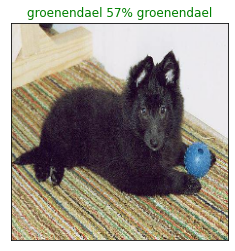

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our model's top prediction, let's make another to visualize our model's top ten predictions

This function will:
* take an input of prediction probabilities array and a ground truth array and an integer
* find the prediction using `get_pred_labels()`
* find the top ten:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences  along with the truth label for sample n.
  """
  pred_probs, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_labels(pred_probs)
  
  # Find the top ten prediction confidences indexes
  top_10_pred_indexes = pred_probs.argsort()[-10:][::-1] # Get's the top ten in ascending order
  # find the top ten prediction values
  top_10_pred_values = pred_probs[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values, color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation='vertical')
  # change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


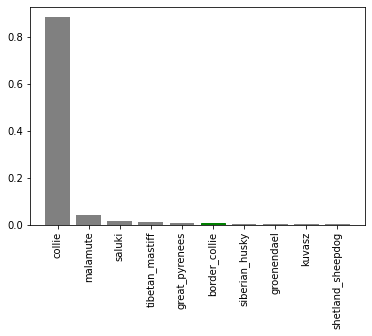

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functionn to help us visualize our predictions and evaluate our model, let's check out a few

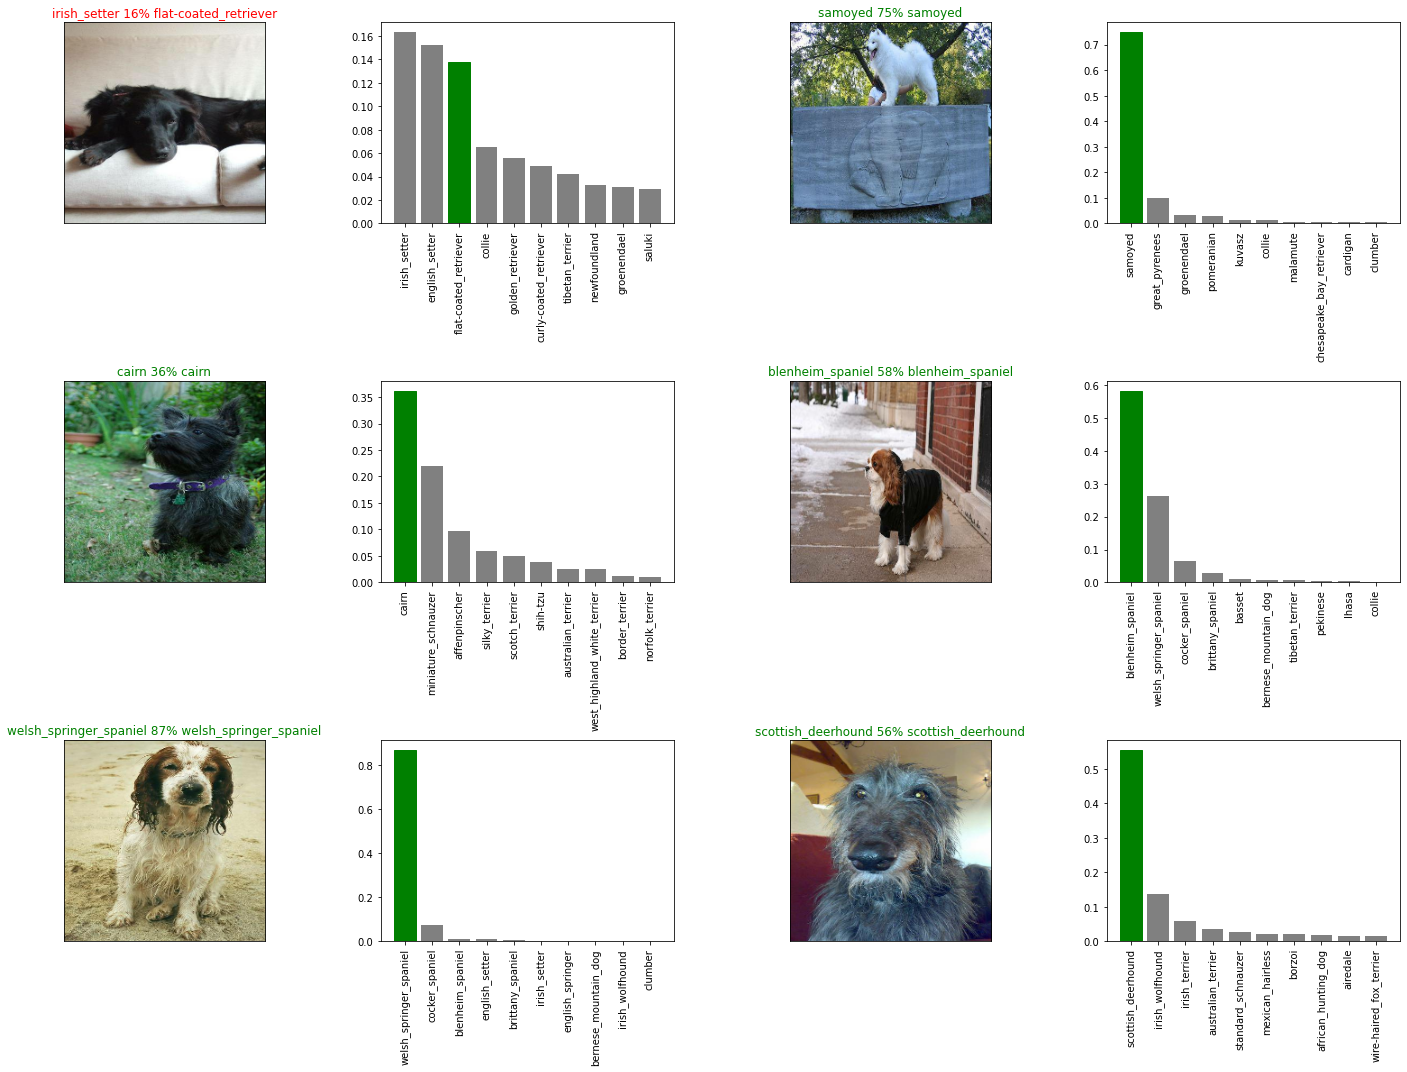

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout( h_pad=1.0)
plt.show()

**Challenge**  How will you plot a confusion matrix with our model's prediction and true labels?

## Saving and reloading a trained model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a  model in a given model directory and appends a suffix(string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog vision/models",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5"  # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specifid path.
  """
  print(f"Loading saved model from: {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  return model


Now we've got functions to save and load a trained model, let's make sure they work

In [ ]:
# Save oor model on a thousand images
save_model(model, suffix="1000-images-mobilenetv2-Adam")


Saving model to: drive/My Drive/Dog vision/models/20200531-120925-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog vision/models/20200531-120925-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_model_1000 = load_model('drive/My Drive/Dog vision/models/20200531-095552-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog vision/models/20200531-095552-1000-images-mobilenetv2-Adam.h5...


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 154ms/step - loss: 1.2445 - accuracy: 0.6900


[1.2445077896118164, 0.6899999976158142]

In [ ]:
# Evaluate the saved model
loaded_model_1000.evaluate(val_data)

7/7 [==============================] - 1s 140ms/step - loss: 1.3290 - accuracy: 0.6600


[1.329023003578186, 0.6600000262260437]

## Training a big dog model (on the full data)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data  batches


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30mins for the first epoch) because the GPU  we're using in the runtime has to load all of the images into memory

In [ ]:
# Fit the model to the full data
full_model.fit(x=full_data,
                epochs=NUM_EPOCHS,
                callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 66s 208ms/step - loss: 0.0316 - accuracy: 0.9966
Epoch 2/100
320/320 [==============================] - 66s 206ms/step - loss: 0.0258 - accuracy: 0.9973
Epoch 3/100
320/320 [==============================] - 66s 208ms/step - loss: 0.0230 - accuracy: 0.9978
Epoch 4/100
320/320 [==============================] - 66s 206ms/step - loss: 0.0203 - accuracy: 0.9983
Epoch 5/100
320/320 [==============================] - 67s 208ms/step - loss: 0.0166 - accuracy: 0.9988
Epoch 6/100
320/320 [==============================] - 66s 206ms/step - loss: 0.0161 - accuracy: 0.9980
Epoch 7/100
320/320 [==============================] - 65s 203ms/step - loss: 0.0137 - accuracy: 0.9989
Epoch 8/100
320/320 [==============================] - 66s 207ms/step - loss: 0.0126 - accuracy: 0.9990
Epoch 9/100
320/320 [==============================] - 65s 204ms/step - loss: 0.0117 - accuracy: 0.9989
Epoch 10/100
320/320 [==============================] - 64s 201m

In [ ]:
save_model(full_model, suffix="full-model-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog vision/models/20200531-140637-full-model-mobilenetv2-Adam.h5...


'drive/My Drive/Dog vision/models/20200531-140637-full-model-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/My Drive/Dog vision/models/20200531-140637-full-model-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog vision/models/20200531-140637-full-model-mobilenetv2-Adam.h5...


# Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into  same format.
Luckily we created a function earlier which can take  a list of filenames as input and convert them into tensor batches.

To make predictions on the test data:
* Get the test image filenames
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter =True (since the test data doesn't have labels
* Make a predictions array by passing the test data batches to the predict() method called on our model.


In [ ]:
# Load test image filenames
test_path = "drive/My Drive/Dog vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog vision/test/f569c5b12fae4ca37d376d21bc05f2b3.jpg',
 'drive/My Drive/Dog vision/test/f2e4e4f1ab9d156443682dc4653f23e5.jpg',
 'drive/My Drive/Dog vision/test/ede33cc93aa6dd4f7bc7fb2436026d08.jpg',
 'drive/My Drive/Dog vision/test/f3094b103a8d45b2c1026f2d5bb4c687.jpg',
 'drive/My Drive/Dog vision/test/f2c4131850c17dee485d48c2bb8a358e.jpg',
 'drive/My Drive/Dog vision/test/f05275e168cf813f7dadd9d1dddfab8a.jpg',
 'drive/My Drive/Dog vision/test/f407f19970c6d8d516722e899adc599c.jpg',
 'drive/My Drive/Dog vision/test/ec81d166f296c1809d8be99cdabb5904.jpg',
 'drive/My Drive/Dog vision/test/ed675fae47e3a3698277131065548e2f.jpg',
 'drive/My Drive/Dog vision/test/f596d629c90c70820c38a094f03be387.jpg']

In [ ]:
# create test data batches
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches......


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note:** Calling `predict()` on our full model and passing it the data batch will take a long time to run (about 1hr).  This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what it has learnt in the training dataset 

In [ ]:
# make predictions on test data using the loaded full model
test_prediction = loaded_full_model.predict(test_data,
                                            verbose=1)

324/324 [==============================] - 6041s 19s/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog vision/preds_array.csv", test_prediction, delimiter=",")

## Preparing test dataset predictions for kaggle

Looking at the Kaggle sample submission, we find that it wants our model's probability prediction outputs in a DataFrame with an ID and a column  for each different dog breed.
https://www. kaggle.com/c/dog-breed-identification/overview/evaluation

To get our data in this format, we'll:
* Create a pandas dataframe with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image's IDs from the filepaths.
* Add data (the prediction probaibilities) to each of the dog breed columns
* Export the dataframe as a csv to submit it to kaggle.

In [ ]:
# create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_labels))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids
preds_df.head()

id  ... yorkshire_terrier
0  f569c5b12fae4ca37d376d21bc05f2b3  ...       6.31724e-07
1  f2e4e4f1ab9d156443682dc4653f23e5  ...       6.56715e-10
2  ede33cc93aa6dd4f7bc7fb2436026d08  ...       1.22028e-10
3  f3094b103a8d45b2c1026f2d5bb4c687  ...       9.52654e-13
4  f2c4131850c17dee485d48c2bb8a358e  ...       0.000139092

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_labels)] = test_prediction
preds_df.head()

id  ... yorkshire_terrier
0  f569c5b12fae4ca37d376d21bc05f2b3  ...       6.31724e-07
1  f2e4e4f1ab9d156443682dc4653f23e5  ...       6.56715e-10
2  ede33cc93aa6dd4f7bc7fb2436026d08  ...       1.22028e-10
3  f3094b103a8d45b2c1026f2d5bb4c687  ...       9.52654e-13
4  f2c4131850c17dee485d48c2bb8a358e  ...       0.000139092

[5 rows x 121 columns]

In [ ]:
# Save our predictions dataframe to csv for submission to kaggle
preds_df.to_csv('drive/My Drive/Dog vision/full_model_predictions_submission_2.csv',
                index=False)

# Making predicrtions on custom images
To make predictions on custom images, we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batches()`.  And since our custom images won't have labels, we set the test_data parameter to true.
* Pass the custom image data batch to our model's predict() method
* convert the prediction output probabiity to prediction labels
* compare the predicted labels to custom images.

In [ ]:
# Get the filepaths of custom images
custom_paths ="drive/My Drive/Dog vision/custom-images/"
custom_image_path = [custom_paths + fname for fname in os.listdir(custom_paths)]


In [ ]:
custom_image_path

['drive/My Drive/Dog vision/custom-images/1.jpg',
 'drive/My Drive/Dog vision/custom-images/2.jfif',
 'drive/My Drive/Dog vision/custom-images/3.jfif',
 'drive/My Drive/Dog vision/custom-images/4.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

Creating test data batches......


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# make prediction on the custom data
custom_preds = loaded_full_model.predict(custom_data)


In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd', 'golden_retriever', 'labrador_retriever', 'boxer']

In [ ]:
# Get custom images (our unbatchify function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

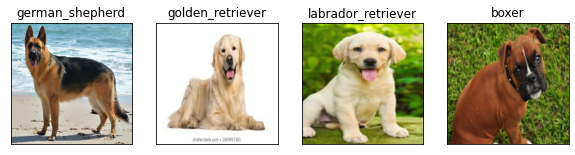

In [ ]:
# check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)